In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv('car data.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.drop('Car_Name', axis=1, inplace=True)

In [ ]:
df['Car_Age'] = 2025 - df['Year']  # Assuming current year is 2025
df.drop('Year', axis=1, inplace=True)


In [ ]:
print(df.isnull().sum())

Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
Car_Age          0
dtype: int64


In [ ]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
df.head()


,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [ ]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



Linear Regression
R2 Score: 0.8488707839193155
MSE: 3.4813498305118165
RMSE: 1.865837568094237

Random Forest
R2 Score: 0.9594566919773236
MSE: 0.9339387986885236
RMSE: 0.9664050903676592


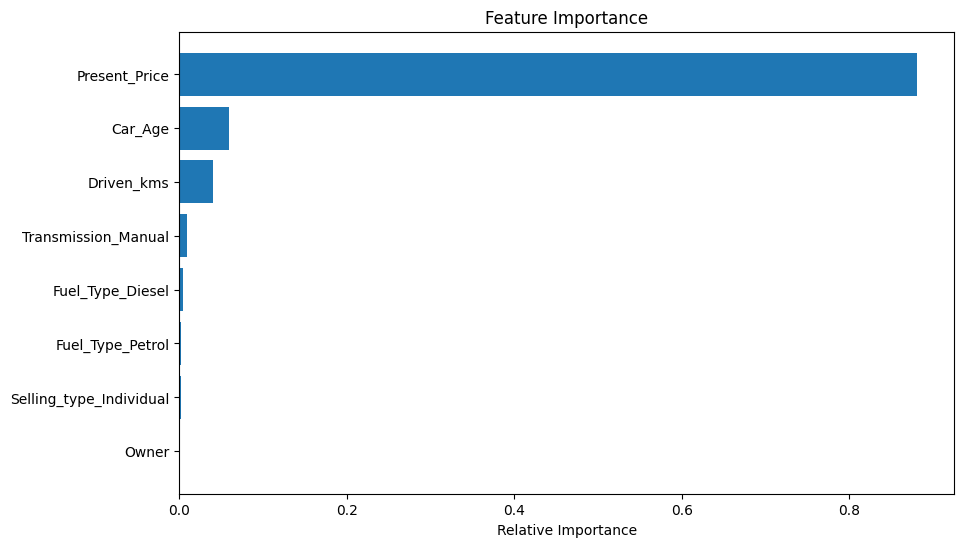

In [ ]:
importances = rf_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
new_car = X_test.iloc[0:1]
predicted_price = rf_model.predict(new_car)
print("Predicted Selling Price:", predicted_price[0])


Predicted Selling Price: 0.4438
